# Hyperdimensional Computing on Speech Recognition

In [1]:
%matplotlib inline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import time
import HD_classifier
from dataloader import *
# reload(HD_classifier)

/Users/AlanYAN/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## UCI

In [4]:
data_dir = 'data/UCI/'
sample_per_class = 1000
num_level = 100
dimension = 20000

from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier


X_train, y_train = load_arabic(data_dir + 'Train_Arabic_Digit.txt', 660, sample_per_class)
X_test, y_test = load_arabic(data_dir + 'Test_Arabic_Digit.txt', 220, sample_per_class)
# clf = XGBClassifier().fit(X_train, y_train)
# print 'XGBoost baseline:'
# print 'training: {}, testing: {}'.format(clf.score(X_train, y_train), clf.score(X_test, y_test))

intervals = np.linspace(-15, 10, num_level+1)
disc_train = np.digitize(X_train, intervals)
disc_test = np.digitize(X_test, intervals)
hdc = HD_classifier.HDClassifier(dimension).fit(disc_train, y_train, num_level)
preds_train = hdc.predict(disc_train)
preds_test = hdc.predict(disc_test)
print 'HDC:'
print 'training: {}, testing: {}'.format((y_train == preds_train).mean(), (y_test == preds_test).mean())

HDC:
training: 0.3772, testing: 0.2167


## ISOLET

In [6]:
data_dir = 'data/ISOLET/'
sample_per_class = 1000
num_level = 50
dimension = 4000

from xgboost import XGBClassifier

X_train, y_train = load_isolet(data_dir + 'isolet1+2+3+4.data')
X_test, y_test = load_isolet(data_dir + 'isolet5.data')
# clf = XGBClassifier().fit(X_train, y_train)
# print 'XGBoost baseline:'
# print 'training: {}, testing: {}'.format(clf.score(X_train, y_train), clf.score(X_test, y_test))

intervals = np.linspace(0, 1, num_level)
disc_train = np.digitize(X_train, intervals)-1
disc_test = np.digitize(X_test, intervals)-1
hdc = HD_classifier.HDClassifier(dimension, verbose=True).fit(disc_train, y_train, num_level)
preds_train = hdc.predict(disc_train)
preds_test = hdc.predict(disc_test)
print 'HDC:'
print 'training: {}, testing: {}'.format((y_train == preds_train).mean(), (y_test == preds_test).mean())

[Warning] small dimension for this data, HVs might not be orthogonal
HDC:
training: 0.00593138826547, testing: 0.0134701731879


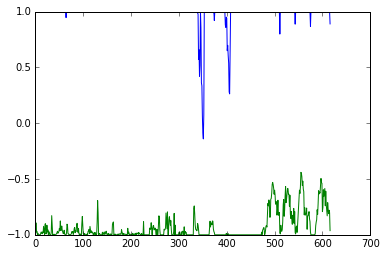

In [11]:
plt.plot(range(X_train.shape[1]), X_train.max(axis=0))
plt.plot(range(X_train.shape[1]), X_train.min(axis=0))
plt.show()

In [ ]:
# CV
print 'sample per class | discrete levels | hyperdimension | training accuracy | testing accuracy'
for sample_per_class in [800]:
    X_train, y_train = load_uci(data_dir + 'Train_Arabic_Digit.txt', 660, sample_per_class)
    X_test, y_test = load_uci(data_dir + 'Test_Arabic_Digit.txt', 220, sample_per_class)
    for num_level in [200]:
        intervals = np.linspace(-15, 10, num_level + 1)
        disc_train = np.digitize(X_train, intervals)
        disc_test = np.digitize(X_test, intervals)
        for dimension in [10000]:
            t = time.time()
            hdc = HD_classifier.HDClassifier(dimension).fit(disc_train, y_train, num_level)
            preds_train = hdc.predict(disc_train)
            preds_test = hdc.predict(disc_test)
            t = time.time() - t
            print '{:<18} {:<17} {:<16} {:<19} {:<18} {}'.format(sample_per_class,
                                                              num_level,
                                                              dimension,
                                                              (y_train == preds_train).mean(),
                                                              (y_test == preds_test).mean())